# notebook to look at ee data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

df = pd.read_parquet("../data/ee_v3_western_us_2.parquet")
df.describe()

,grid_size,population_density,elevation_p5,elevation_p50,elevation_p95,LST_Day_1km_p5,LST_Day_1km_p50,LST_Day_1km_p95,LST_Night_1km_p5,LST_Night_1km_p50,...,land_cover_08,land_cover_09,land_cover_10,land_cover_11,land_cover_12,land_cover_13,land_cover_14,land_cover_15,land_cover_16,land_cover_17
count,96.0,9.600000e+01,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,...,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,2.0,1.188561e+06,849.918915,1255.043601,1952.380205,17.656585,25.421021,30.822350,2.645343,6.277329,...,2175.541667,1706.552083,18590.708333,32.260417,1837.135417,330.458333,10.197917,21.614583,2260.604167,619.052083
std,0.0,2.979204e+06,584.567302,681.595403,763.094529,6.605339,6.435667,5.738537,4.710830,4.529991,...,3179.502649,2254.149525,11942.077961,60.104338,3145.340499,861.043589,38.395345,122.574349,5047.071258,1398.337000
min,2.0,3.668740e+03,-41.208412,0.003927,57.484959,6.447919,11.085705,16.045858,-6.230341,-2.628970,...,0.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.0,6.749970e+04,263.677940,800.775038,1435.538921,12.412747,20.967433,26.133692,-0.951825,3.029975,...,21.250000,158.500000,7850.750000,0.750000,96.000000,19.500000,0.000000,0.000000,32.250000,2.000000
50%,2.0,2.690668e+05,918.812883,1335.376194,1993.284093,17.635611,26.031045,31.086774,2.248943,5.569832,...,588.000000,756.500000,21415.500000,8.000000,428.000000,69.500000,0.000000,0.000000,185.500000,33.500000
75%,2.0,1.091223e+06,1283.040171,1739.393764,2461.454015,22.361765,30.266050,34.490054,5.408448,9.375465,...,3220.000000,2346.750000,28087.500000,40.500000,1949.500000,303.000000,0.000000,0.000000,1431.500000,400.250000
max,2.0,2.325245e+07,2215.523775,2711.411927,3591.259391,34.133184,40.531209,43.409790,15.468671,17.830459,...,15018.000000,9416.000000,39565.000000,440.000000,15913.000000,6896.000000,255.000000,1089.000000,25613.000000,8764.000000


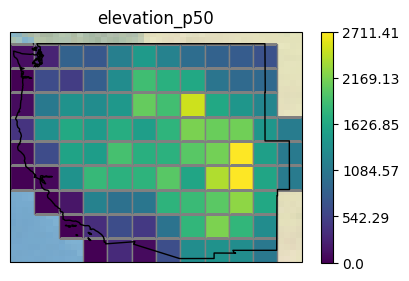

In [3]:
from birdcall_distribution.geo import (
    get_western_us_geometry,
    generate_grid,
    WESTERN_US_EXTENT,
    get_modis_land_cover_name,
)
from birdcall_distribution.plot import dataframe_color_getter, plot_grid
from functools import partial
import matplotlib.pyplot as plt

geometry = get_western_us_geometry()
grid = generate_grid(geometry, WESTERN_US_EXTENT, (2, 2))


def plot(prop):
    plot_grid(
        geometry,
        WESTERN_US_EXTENT,
        grid,
        color_callback=partial(dataframe_color_getter, df, "name", prop),
        vmin=df[prop].min(),
        vmax=df[prop].max(),
        draw_gridline=False,
        figsize=(5, 3),
    )
    name = (
        f"{prop}: {get_modis_land_cover_name(prop)}" if "land_cover" in prop else prop
    )
    plt.title(name)
    plt.show()


plot("elevation_p50")

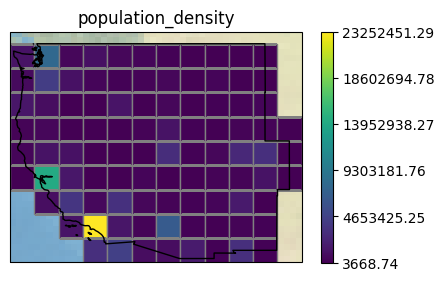

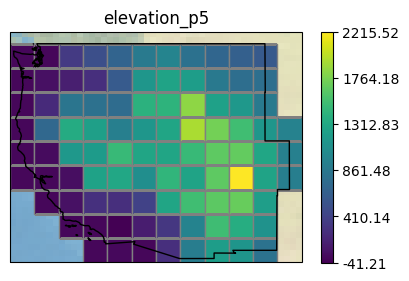

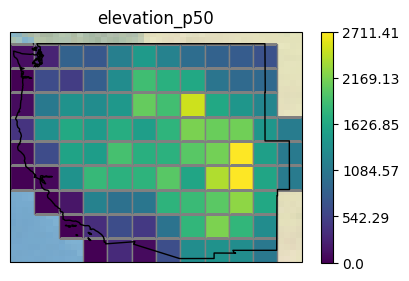

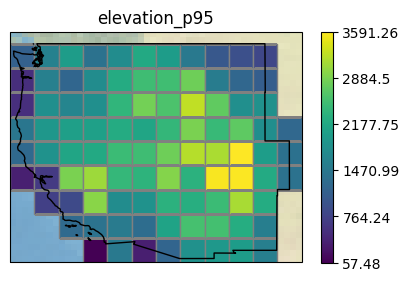

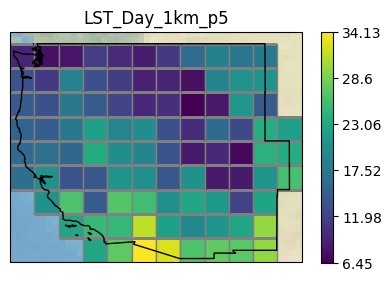

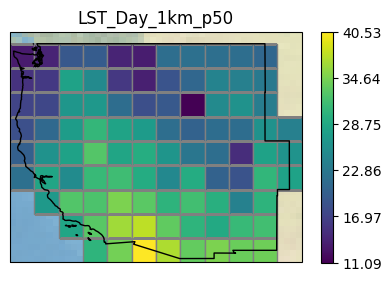

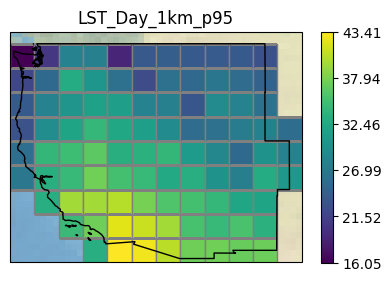

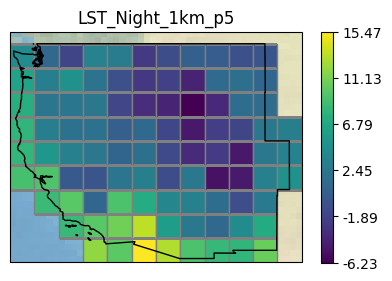

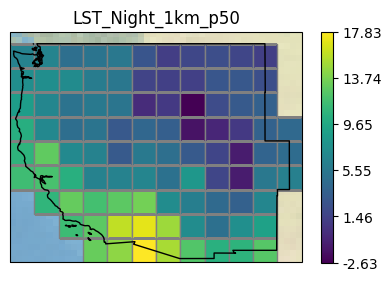

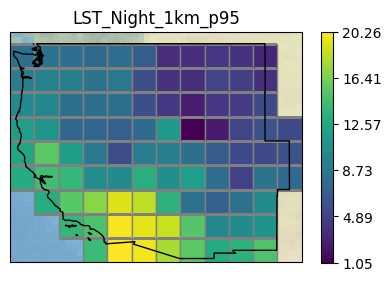

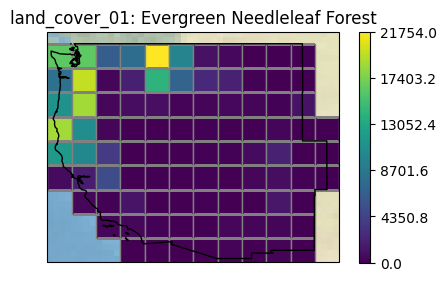

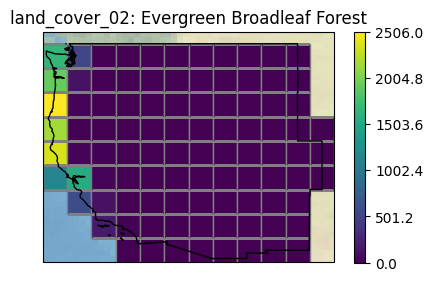

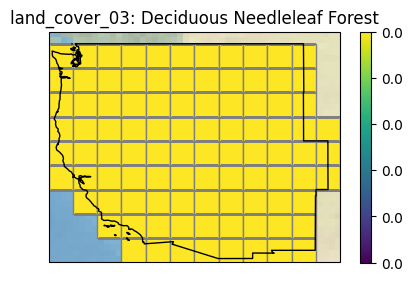

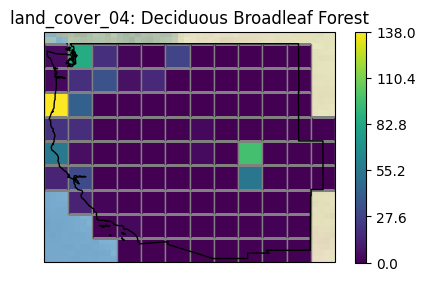

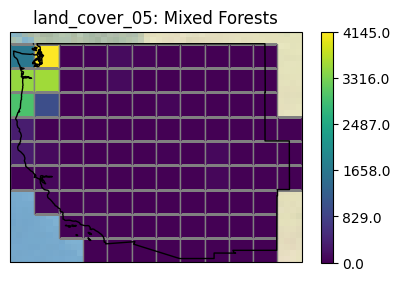

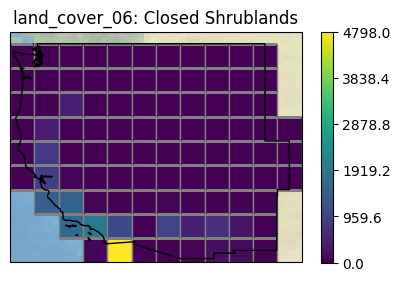

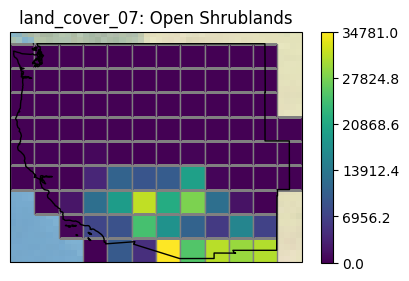

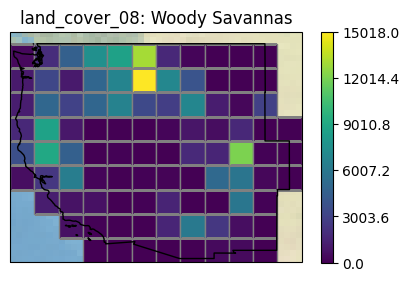

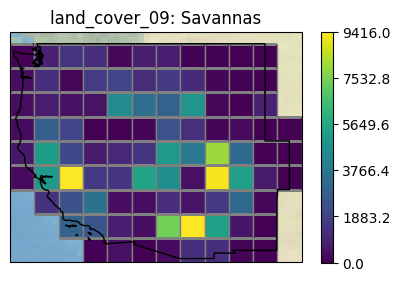

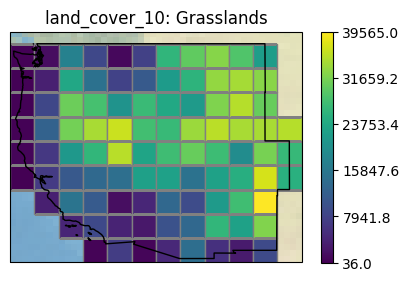

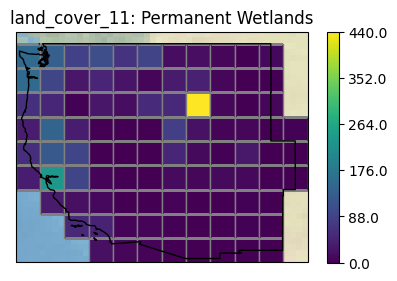

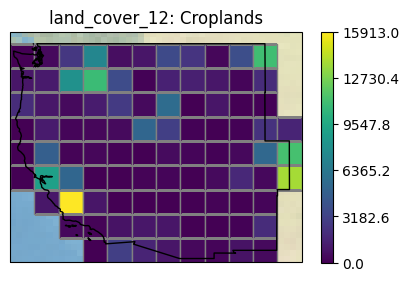

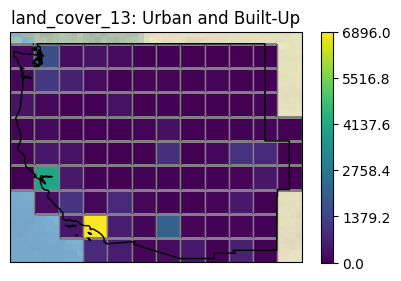

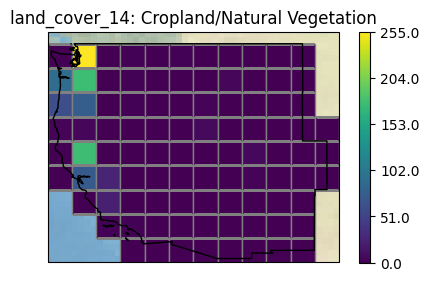

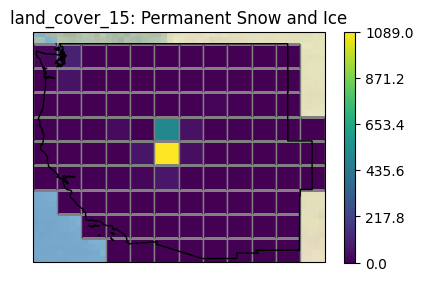

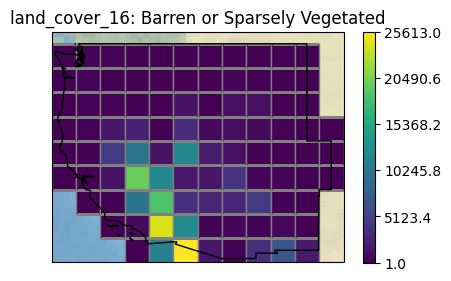

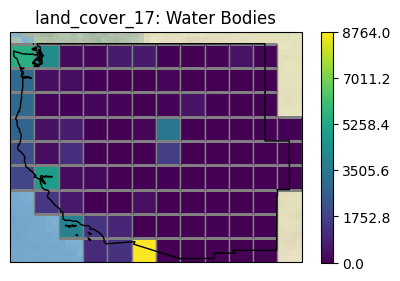

In [4]:
for col in df.columns[3:]:
    plot(col)